# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



In [1]:
#Check Python version
! python --version

Python 3.12.8


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\jerem\\OneDrive\\Documents\\CodeInstitute\\vscode-projects\\Capstone_Evaluating_Domestic_Electrification_Measures\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\jerem\\OneDrive\\Documents\\CodeInstitute\\vscode-projects\\Capstone_Evaluating_Domestic_Electrification_Measures'

# Section 1

Section 1 content

Import necessary Python Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read 2023 car database data obtained from Kaggle at
https://www.kaggle.com/datasets/kkhandekar/cheapest-electric-cars

which itself was scraped in 2023 from 
https://ev-database.org/ which appears to have more up to date data.

I had insufficient time to update with latest data from https://ev-database.org, but this would be a key future improvement as ecars are fast improving in price, technology and UK availability.  So the overall cost savings I calculate below are likely to be conservative, but I anticipate will still show more potential total cost savings for Ecars than for Solar PV or ASHPs.  If this is not the case I shall attempt to derive and apply an adjustment factor to costs based on the ratio of current costs to costs in the above database for a sample of Ecars still on sale today to make any comparisons with Solar PV and heat pumps fairer.

It should be noted here that, as stated elsewhere, I will calculate cost and CO2 savings based on linear regression or averaged cost and technical information for various mileage range intervals, e.g. 50-75 miles, rather than for individual cars to avoid potentially implying a particular car has the best cost saving which could have legal implications and is likely to be unfair given the age of the above dataset and the fact other assumptions have not been peer reviewed.

In [6]:
df_ecars = pd.read_csv('Data/1_Raw/Cheapestelectriccars-EVDatabase_2023.csv')
df_ecars

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",NaN
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000"
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",NaN
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
304,Volkswagen ID.7 Pro,77 kWh useable battery Expected from ...,8.0 sec,180 km/h,470 km,164 Wh/km,700 km/h,Rear Wheel Drive,5,"€55,000","£53,000"
305,Volkswagen ID.7 Pro S,86 kWh useable battery Expected from ...,7.0 sec,180 km/h,520 km,165 Wh/km,800 km/h,Rear Wheel Drive,5,"€60,000","£56,000"
306,Polestar 4 Long Range Single Motor,94 kWh useable battery Expected from ...,7.4 sec,180 km/h,510 km,184 Wh/km,760 km/h,Rear Wheel Drive,5,"€60,000","£55,000"
307,Polestar 4 Long Range Dual Motor,94 kWh useable battery Expected from ...,3.8 sec,200 km/h,475 km,198 Wh/km,710 km/h,All Wheel Drive,5,"€65,000","£60,000"


In [7]:
df_ecars.info()

# df_ecars.null_counts()

null_counts_per_column = df_ecars.isna().sum()
print("\nNull values per column:")
print(null_counts_per_column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             309 non-null    object
 1   Subtitle         309 non-null    object
 2   Acceleration     309 non-null    object
 3   TopSpeed         309 non-null    object
 4   Range            309 non-null    object
 5   Efficiency       309 non-null    object
 6   FastChargeSpeed  309 non-null    object
 7   Drive            309 non-null    object
 8   NumberofSeats    309 non-null    int64 
 9   PriceinGermany   282 non-null    object
 10  PriceinUK        198 non-null    object
dtypes: int64(1), object(10)
memory usage: 26.7+ KB

Null values per column:
Name                 0
Subtitle             0
Acceleration         0
TopSpeed             0
Range                0
Efficiency           0
FastChargeSpeed      0
Drive                0
NumberofSeats        0
PriceinGermany      27
Pri

So UK price, battery size (called 'Subtitle above') and Range are all non numerical, containing a mix of text and numbers, from which the numerical data will need to be extracted into new numerical format columns to be of use in the analysis. But only 198 of the 309 Ecars in the database have UK prices.

So 111 of these cars have no UK prices and the data won't be of use in calculating total cost savings. I checked a few such cars online and indeed some are not for sale in the UK. Others are so I began investigating missing prices for some, e.g. for the Dacia Spring which is the cheapest electric car now (October 2025) on sale in the UK, as I thought it would be useful to include these in the dataset, but while doing so observed others have come down in price so adding the Dacia Spring and possibly changing a few prices observed along the way would be inconsistent with using 2023 data elsewhere, so I decided to omit this step for consistency.  As stated above ideally the whole dataset would be refreshed with more up to date UK Ecar data when time allows after this project.

Below I have removed rows with no UK costs. 

In [8]:
df_ecars = df_ecars.dropna(subset=['PriceinUK'])
df_ecars

# df_ecars.null_counts()
null_counts_per_column = df_ecars.isna().sum()
print("Null values per column:")
print(null_counts_per_column)

Null values per column:
Name               0
Subtitle           0
Acceleration       0
TopSpeed           0
Range              0
Efficiency         0
FastChargeSpeed    0
Drive              0
NumberofSeats      0
PriceinGermany     9
PriceinUK          0
dtype: int64


And beliw I have converted UK prices to integers to allow processing as numbers after £ sign are all integers.  Then apply £ and comma seperated format.

In [9]:
df_ecars['UKPrice_£'] = df_ecars['PriceinUK'].str.replace('£', '').str.replace(',', '').astype('Int64')
# df_ecars['UKPrice_£'] = df_ecars['UKPrice_£'].apply(lambda x: f"£{x:,}")
df_ecars[['PriceinUK', 'UKPrice_£']]

C:\Users\jerem\AppData\Local\Temp\ipykernel_36560\748650672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars['UKPrice_£'] = df_ecars['PriceinUK'].str.replace('£', '').str.replace(',', '').astype('Int64')


,PriceinUK,UKPrice_£
1,"£142,400",142400
2,"£115,000",115000
5,"£59,990",59990
6,"£84,500",84500
7,"£29,995",29995
...,...,...
304,"£53,000",53000
305,"£56,000",56000
306,"£55,000",55000
307,"£60,000",60000


In [10]:
df_ecars[['PriceinUK', 'UKPrice_£']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 1 to 308
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PriceinUK  198 non-null    object
 1   UKPrice_£  198 non-null    Int64 
dtypes: Int64(1), object(1)
memory usage: 4.8+ KB


I then extracted range km number from the strings in the 'Range' column, sort table in ascending range order and calculate range in mi also, rounding to integers as km are integers.

In [11]:

# df_ecars['Range_km'] = df_ecars['Range'].str.replace(' km', '').astype('Int64') gives same result but same warning as below
df_ecars['Range_km'] = df_ecars['Range'].str.split(' ').str[0].astype('Int64')
df_ecars.sort_values(by='Range_km', inplace=True)
df_ecars.reset_index(drop=True, inplace=True)
df_ecars['Range_mi']= (df_ecars['Range_km']/1.60934).astype('float')

C:\Users\jerem\AppData\Local\Temp\ipykernel_36560\3946960188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars['Range_km'] = df_ecars['Range'].str.split(' ').str[0].astype('Int64')
C:\Users\jerem\AppData\Local\Temp\ipykernel_36560\3946960188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars.sort_values(by='Range_km', inplace=True)
C:\Users\jerem\AppData\Local\Temp\ipykernel_36560\3946960188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

The method to split and use the first part of the 'Range' column is in line with most suggested options I can find online. I could not understand how to apply the recommended iloc method to avoid the 'SettingWithCopy' warnings.  However, in light of above warnings I have checked the results below and is OK.  All integers with values seen to be in line with Range column in original dataset.

In [12]:
df_ecars[['Range', 'Range_km', 'Range_mi']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Range     198 non-null    object 
 1   Range_km  198 non-null    Int64  
 2   Range_mi  198 non-null    float64
dtypes: Int64(1), float64(1), object(1)
memory usage: 5.0+ KB


In [13]:
df_ecars[['Range_km', 'Range_mi']].describe()

,Range_km,Range_mi
count,198.0,198.000000
mean,374.570707,232.748025
std,95.749475,59.496113
min,170.0,105.633365
25%,310.0,192.625548
50%,390.0,242.335367
75%,440.0,273.404004
max,640.0,397.678551


In [14]:
pd.set_option('display.max_rows', 200)
df_ecars[['Range', 'Range_km', 'Range_mi']]

,Range,Range_km,Range_mi
0,170 km,170,105.633365
1,170 km,170,105.633365
2,170 km,170,105.633365
3,180 km,180,111.847093
4,180 km,180,111.847093
5,180 km,180,111.847093
6,180 km,180,111.847093
7,180 km,180,111.847093
8,180 km,180,111.847093
9,185 km,185,114.953956


In [15]:
df_ecars['Battery_kWh'] = df_ecars['Subtitle'].str.split(' ').str[0].astype('float')

C:\Users\jerem\AppData\Local\Temp\ipykernel_36560\3651821096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars['Battery_kWh'] = df_ecars['Subtitle'].str.split(' ').str[0].astype('float')


New Battery_kWh column data checked in light of above warnings and is OK.  All floats seen to be in line with Range column in original dataset.

In [16]:
df_ecars['Battery_kWh'].describe()

count    198.000000
mean      72.565657
std       19.797757
min       28.500000
25%       57.625000
50%       75.000000
75%       85.000000
max      108.400000
Name: Battery_kWh, dtype: float64

In [17]:
df_ecars[['Subtitle', 'Battery_kWh']]

,Subtitle,Battery_kWh
0,28.9 kWh useable battery Available si...,28.9
1,28.5 kWh useable battery Available si...,28.5
2,30 kWh useable battery Available sinc...,30.0
3,46.3 kWh useable battery Available si...,46.3
4,46.3 kWh useable battery Available si...,46.3
5,46.3 kWh useable battery Available si...,46.3
6,46.3 kWh useable battery Available si...,46.3
7,46.3 kWh useable battery Available si...,46.3
8,28.9 kWh useable battery Available si...,28.9
9,46.3 kWh useable battery Available si...,46.3


Convert 'Efficiency' from text to kWh/km and check that it is similar to Battery_kWh/Range_km. The expected ratio between the two is 1.  I have disabled the chained assignment warning to suppress the SettingWithCopy warnings which clutter the flow but checked the results to ensure they work OK.

In [18]:
pd.options.mode.chained_assignment = None  # default='warn'
# The above line suppresses the SettingWithCopyWarning. I have checked the results below and is OK.
df_ecars['Efficiency*1000'] = df_ecars['Efficiency'].str.split(' Wh').str[0].astype('float')/1000
df_ecars['Battery_kWh/Range_km']= (df_ecars['Battery_kWh']/df_ecars['Range_km']).round(3)
df_ecars['Efficiency_ratio'] = (df_ecars['Efficiency*1000']/df_ecars['Battery_kWh/Range_km'])
df_ecars[['Efficiency*1000', 'Battery_kWh/Range_km', 'Efficiency_ratio']].head(20)

,Efficiency*1000,Battery_kWh/Range_km,Efficiency_ratio
0,0.170,0.17,1.0
1,0.168,0.168,1.0
2,0.176,0.176,1.0
3,0.257,0.257,1.0
4,0.257,0.257,1.0
5,0.257,0.257,1.0
6,0.257,0.257,1.0
7,0.257,0.257,1.0
8,0.161,0.161,1.0
9,0.250,0.25,1.0


In [19]:
df_ecars['Efficiency_ratio'].value_counts()

Efficiency_ratio
1.0         192
1.004329      3
1.005208      2
1.005236      1
Name: count, dtype: Int64

So the 'efficiency', battery capacity and range given in original dataset tie together well aside from a few minor anomalies, likely due to rounding.  So I will just use Battery_kwh and Range_km moving forward to calculate miles_per_kWh (akin to petrol miles per gallon) for analysis.

In [20]:
df_ecars['Efficiency_mi/kWh'] = (df_ecars['Range_mi']/df_ecars['Battery_kWh'])
pd.set_option('display.max_rows', 20)
df_ecars[['Efficiency_mi/kWh']]

,Efficiency_mi/kWh
0,3.655134
1,3.706434
2,3.521112
3,2.415704
4,2.415704
...,...
193,3.077554
194,3.597421
195,3.256731
196,3.728236


Concatenate car range, battery size and index to facilitate a sort in order of ascending range, where this is the same, battery size, where the same price and where the same, index.  Then assign a new index.

In [21]:
df_ecars['RangeBatterySizeIndexConcatanate'] = 1000000000 * df_ecars['Range_mi'] + 1000 * df_ecars['UKPrice_£'] + df_ecars['Battery_kWh'] + df_ecars.index
df_ecars = df_ecars.sort_values(by='RangeBatterySizeIndexConcatanate', ascending=True)
df_ecars.reset_index(drop=True, inplace=True)
df_ecars

pd.options.mode.chained_assignment = 'warn'  # Restores the default SettingWithCopyWarning.

Reminder of all columns now in dataframe.  Will remove some as now redundant and keep some for info though they may not be used in the analysis, e.g. name, top speed etc.

In [22]:
df_ecars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              198 non-null    object 
 1   Subtitle                          198 non-null    object 
 2   Acceleration                      198 non-null    object 
 3   TopSpeed                          198 non-null    object 
 4   Range                             198 non-null    object 
 5   Efficiency                        198 non-null    object 
 6   FastChargeSpeed                   198 non-null    object 
 7   Drive                             198 non-null    object 
 8   NumberofSeats                     198 non-null    int64  
 9   PriceinGermany                    189 non-null    object 
 10  PriceinUK                         198 non-null    object 
 11  UKPrice_£                         198 non-null    Int64  
 12  Range_km

Drop definitely redundant columns but keep some descriptive columns for info now, e.g. car name, performance and seat number, and in case of use later.  When creating the MatplotLib plot below of price, efficiency and battery size, I tried plotting with the original UK price ('PriceinUK') column on the y-axis as this shows the price in £ and comma seperated format, but this did not plot well so I have also removed this column.  New index column also added beginning 1, = auto index + 1.

In [23]:
df_ecars.drop(columns=['Subtitle', 'Range', 'Efficiency','PriceinGermany', 'PriceinUK','Range_km','Efficiency*1000', 'Battery_kWh/Range_km', 'Efficiency_ratio', 'RangeBatterySizeIndexConcatanate'], inplace=True)
df_ecars['ecarindex'] = df_ecars.index+1
df_ecars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               198 non-null    object 
 1   Acceleration       198 non-null    object 
 2   TopSpeed           198 non-null    object 
 3   FastChargeSpeed    198 non-null    object 
 4   Drive              198 non-null    object 
 5   NumberofSeats      198 non-null    int64  
 6   UKPrice_£          198 non-null    Int64  
 7   Range_mi           198 non-null    float64
 8   Battery_kWh        198 non-null    float64
 9   Efficiency_mi/kWh  198 non-null    float64
 10  ecarindex          198 non-null    int64  
dtypes: Int64(1), float64(3), int64(2), object(5)
memory usage: 17.3+ KB


Columns rearranged with new index column moved to left.

In [24]:
df_ecars = df_ecars[['ecarindex', 'Name', 'TopSpeed','FastChargeSpeed','Drive','NumberofSeats','UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']]
df_ecars.head()

,ecarindex,Name,TopSpeed,FastChargeSpeed,Drive,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
0,1,Mazda MX-30,140 km/h,210 km/h,Front Wheel Drive,5,30050,105.633365,30.0,3.521112
1,2,Honda e Advance,145 km/h,180 km/h,Rear Wheel Drive,4,36920,105.633365,28.5,3.706434
2,3,Mini Cooper SE Convertible,150 km/h,240 km/h,Front Wheel Drive,4,52500,105.633365,28.9,3.655134
3,4,Mini Cooper SE,150 km/h,260 km/h,Front Wheel Drive,4,29000,111.847093,28.9,3.870142
4,5,Citroen e-Jumpy Combi XL 50 kWh,130 km/h,290 km/h,Front Wheel Drive,7,35995,111.847093,46.3,2.415704


Examine statistical info for numerical columns.

In [25]:
df_ecars.describe()

,ecarindex,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
count,198.000000,198.000000,198.0,198.000000,198.000000,198.000000
mean,99.500000,5.141414,64255.19697,232.748025,72.565657,3.245323
std,57.301832,0.849127,37481.721471,59.496113,19.797757,0.417254
min,1.000000,4.000000,25995.0,105.633365,28.500000,2.105763
25%,50.250000,5.000000,38876.25,192.625548,57.625000,2.995306
50%,99.500000,5.000000,52682.5,242.335367,75.000000,3.267225
75%,148.750000,5.000000,76336.5,273.404004,85.000000,3.594766
max,198.000000,7.000000,350000.0,397.678551,108.400000,4.106463


I am now ready to start visualising and statistically analysing the Ecar data. From the data I intend to produce modelled input data on price, mileage range and other technical data from which to calculate savings for various range and annual mileage scenarios. The input data could be obtained from linear regression analysis on the actual car data or archetypes based on the averages of cars in mileage ranges.  As mentioned above this modelling of input data is necessary to avoid legal issues and unfairness which could arise if presenting results on actual individual cars.

Below I will Plot Range, price, efficiency and battery size to give a visual data overview.

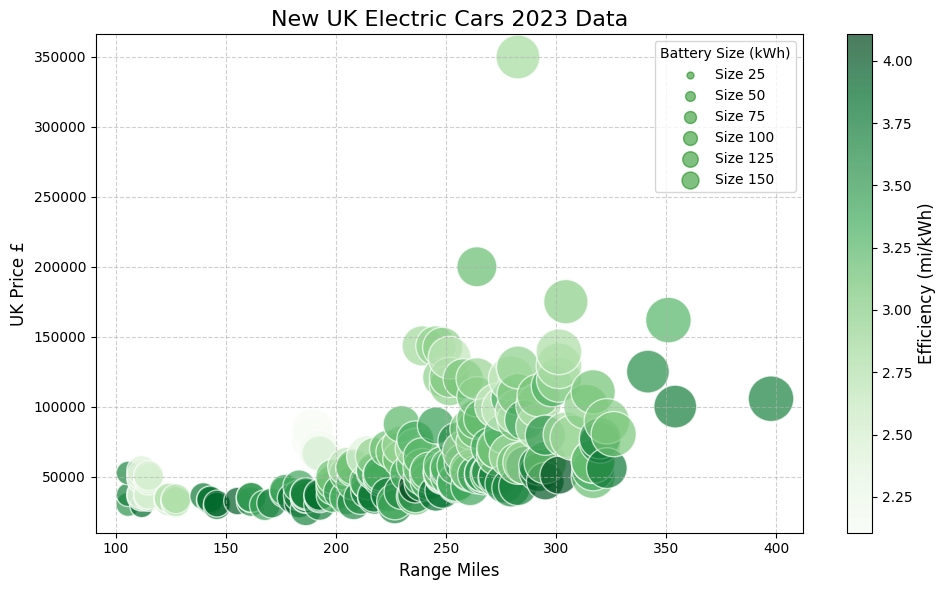

In [26]:
x=df_ecars['Range_mi']
y=df_ecars['UKPrice_£']
sizes=df_ecars['Battery_kWh']*10  # Scale sizes for better visibility
colors=df_ecars['Efficiency_mi/kWh']  # Color by efficiency

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=sizes, c=colors, cmap='Greens', alpha=0.7, edgecolors='w')

# Add labels and title
plt.title("New UK Electric Cars 2023 Data", fontsize=16)
plt.xlabel("Range Miles", fontsize=12)
plt.ylabel("UK Price £", fontsize=12)

# Add a color bar to indicate the color mapping
colorbar = plt.colorbar(scatter)
colorbar.set_label("Efficiency (mi/kWh)", fontsize=12)

# Add a legend for marker size
for size in [25, 50, 75, 100, 125, 150]:
    plt.scatter([], [], s=size, c='green', alpha=0.5, label=f"Size {size}")
plt.legend(title="Battery Size (kWh)", loc="upper right")

# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



Can see from the above that as you'd expect in general cars with larger range cost more and have larger batteries, but this trend does not hold well for the lowest range cars where some are considerably dearer than some with conssiderably longer range.
Can also see a mix of higher and lower mi/kWh energy efficiencies across all size ranges i.e. not generally larger for small cars and lower for large cars as might have been anticipated, some larger cars also have good mi/kWh efficiency.
One significant outlier costing £350K and one moderate outlier (£200K) which seem unlikely to result in being shown to be cost effective in subsequent analysis. These are identified immediately below as luxury cars and prices seem reasonable based on manual online research.

Examining cost outliers, it can be seen that these are luxury high power cars and a quick internet search confirmed the prices seem in the right ball park.

In [27]:
df_ecars.sort_values(by=['UKPrice_£'], ascending=[False], inplace=False).head(2)

,ecarindex,Name,TopSpeed,FastChargeSpeed,Drive,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
163,164,Rolls-Royce Spectre,250 km/h,540 km/h,All Wheel Drive,4,350000,282.724595,100.0,2.827246
136,137,Maserati GranTurismo Folgore,320 km/h,990 km/h,All Wheel Drive,4,200000,264.083413,83.0,3.181728


Below I have produced pairplots and a correlation matrix for the four key numerical variables.

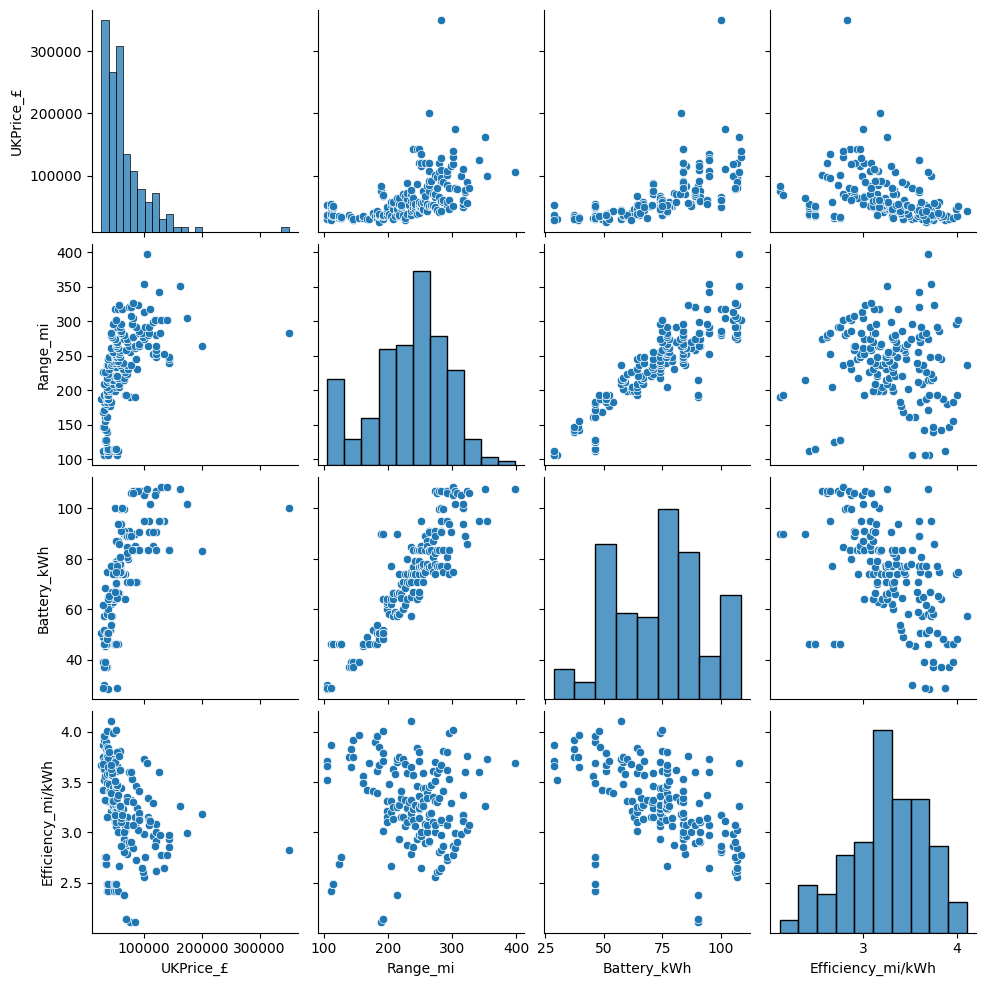

                   UKPrice_£  Range_mi  Battery_kWh  Efficiency_mi/kWh
UKPrice_£           1.000000  0.507168     0.645650          -0.337378
Range_mi            0.507168  1.000000     0.889600           0.108672
Battery_kWh         0.645650  0.889600     1.000000          -0.334708
Efficiency_mi/kWh  -0.337378  0.108672    -0.334708           1.000000


In [28]:
# pairplot and correlation matrix to see if any other trends can be observed
sns.pairplot(data=df_ecars[['UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']])
plt.show()
correlation_matrix = df_ecars[['UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']].corr(method='pearson')
print(correlation_matrix)

From the above pairplots and correlation matrix I can see the following:-

The strongest correlation is between battery size and range with a high index of 0.89.

Cars with higher battery size and thus range tend to cost more though the correlations between price and battery size and price and range are only moderate with indices of 0.65 and 0.51 respectively. 

Efficiency has a weak negative correlation against UKprice and battery size with indices of -0.34 and 
-0.33 respectively indicating a weak trend of more expensive cars and those with larger batteries having lower efficiency but with many exceptions so plenty choice for consumers to select the more efficient options within their price and range requirements.

The correlation between efficiency and range is very weak (index=0.11) and positive rather than negative suggesting higher range does not mean lower efficiency in fact mildly the opposite on average.

Linear regression could be used to derive a formula to calculate the price for a car with the mean battery size in a mileage range, but correlations between price and other parameters seem relatively poor so one approach could be to remove outliers and revise the correlation matrix below to see if this significantly improves correlations between price and other variables.  

Firstly, it seems useful to examine the distribution of mileage ranges to see if it is necessary to remove outliers which are likely to have very few cars within mileage ranges which if included in the final analysis could be too identifiable with the results.

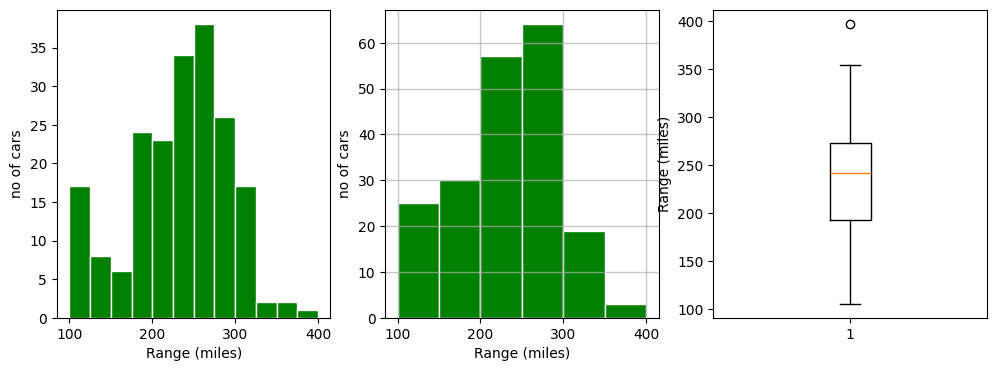

In [29]:
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.hist(df_ecars['Range_mi'], bins=range(100,425,25), color='green', edgecolor='white')
plt.xlabel("Range (miles)")
plt.ylabel("no of cars")
plt.subplot(1,3,2)
plt.hist(df_ecars['Range_mi'], bins=range(100,425,50), color='green', edgecolor='white')
plt.xlabel("Range (miles)")
plt.ylabel("no of cars")
plt.grid(True, which='both', linestyle='-', linewidth=1, alpha=0.7)
plt.subplot(1,3,3)
plt.boxplot(x=df_ecars['Range_mi'])
plt.ylabel("Range (miles)")
plt.show()

So there is one statistical range outlier car with a range of around 400 miles.  There are almost 20 cars with a range between 300 and 350 miles but few of these have a range above 325 miles.  Just as a check below these are shown and seen to be only 5 in number of which only 2 have mileage ranges of 325-350 and only 2 of 350-375, the highest being 354, and 1 is >375 (the outlier).  I could choose to either group the cars into mileage ranges each 50 miles wide or 25 miles wide which would mean excluding the 5 cars with a range of >325 miles or 4 if I still exclude the outlier.  A third option could be to have 25 mile wide range bins up to 300 miles then include the rest in the largest >300 mile bin.  However, the averages in such a bin seem unlikely to be greatly affected since most cars in this bin will have a range between 300-325 miles.  Below I assume a user will select a car based on a regular mileage they need to travel between being able to recharge, e.g. a daily commute or a weekly or very regular family visit, both ways if there is no charging at the place of work or visitation. I also assume a range of this required mileage /0.6 is selected to allow the car to operate with charge levels between 20 and 80% to maximise battery longevity. A range of 325 miles would allow a range of 195 miles staying within the ideal 20-80% charge levels, which is likely to exceed most people's requirements. So I have opted to model car prices and technical parameters in 25 mile wide bins up to 325 miles and exclude the 4 cars with slightly higher ranges of up to 354 miles, all with makers represented in lower range cars ratained in the analysis.

In [30]:
df_ecars.sort_values(by=['Range_mi'], ascending=[False], inplace=False).query("Range_mi > 325")

,ecarindex,Name,TopSpeed,FastChargeSpeed,Drive,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
197,198,Mercedes EQS 450+,210 km/h,960 km/h,Rear Wheel Drive,5,105610,397.678551,107.8,3.689040
196,197,Tesla Model S Dual Motor,250 km/h,790 km/h,All Wheel Drive,5,100000,354.182460,95.0,3.728236
195,196,Mercedes EQS AMG 53 4MATIC+,250 km/h,840 km/h,All Wheel Drive,5,161860,351.075596,107.8,3.256731
194,195,Tesla Model S Plaid,282 km/h,770 km/h,All Wheel Drive,5,125000,341.755005,95.0,3.597421
193,194,Audi Q8 e-tron Sportback 55 quattro,200 km/h,710 km/h,All Wheel Drive,5,80300,326.220687,106.0,3.077554


In [31]:
df_ecars = df_ecars.drop(df_ecars[df_ecars['Range_mi'] > 325].index)
df_ecars


,ecarindex,Name,TopSpeed,FastChargeSpeed,Drive,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
0,1,Mazda MX-30,140 km/h,210 km/h,Front Wheel Drive,5,30050,105.633365,30.0,3.521112
1,2,Honda e Advance,145 km/h,180 km/h,Rear Wheel Drive,4,36920,105.633365,28.5,3.706434
2,3,Mini Cooper SE Convertible,150 km/h,240 km/h,Front Wheel Drive,4,52500,105.633365,28.9,3.655134
3,4,Mini Cooper SE,150 km/h,260 km/h,Front Wheel Drive,4,29000,111.847093,28.9,3.870142
4,5,Citroen e-Jumpy Combi XL 50 kWh,130 km/h,290 km/h,Front Wheel Drive,7,35995,111.847093,46.3,2.415704
...,...,...,...,...,...,...,...,...,...,...
188,189,BMW i7 xDrive60,240 km/h,760 km/h,All Wheel Drive,5,110545,316.900096,101.7,3.116028
189,190,Mercedes EQE 300,210 km/h,650 km/h,Rear Wheel Drive,5,74345,320.006959,89.0,3.595584
190,191,Mercedes EQE 350,210 km/h,650 km/h,Rear Wheel Drive,5,77345,320.006959,89.0,3.595584
191,192,Volkswagen ID.7 Pro S,180 km/h,800 km/h,Rear Wheel Drive,5,56000,323.113823,86.0,3.757137


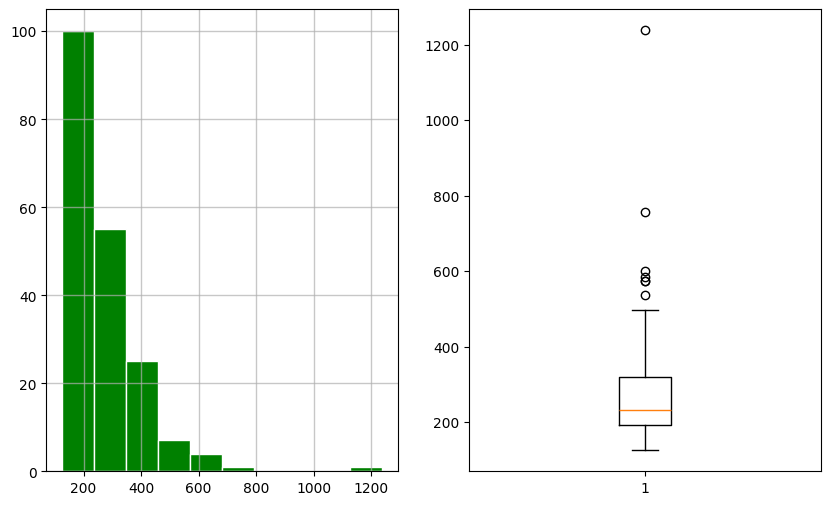

In [44]:
df_ecars['Pricepermilerange'] = df_ecars['UKPrice_£'] / df_ecars['Range_mi']
df_ecars['Pricepermilerange']
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.hist(df_ecars['Pricepermilerange'], bins=10, color='green', edgecolor='white')
plt.grid(True, which='both', linestyle='-', linewidth=1, alpha=0.7)
plt.subplot(1,2,2)
plt.boxplot(x=df_ecars['Pricepermilerange'])
plt.show()

In [34]:
data = []
# Create a range of annual mileages from 2,500 to 40,000 in increments of 2,500 
# and nominal required ranges from 50 to 200 in increments of 50
for a in range(1, 16):
    for r in range(1, 5):
        row = [2500+2500*a, r*50]
        data.append(row)
        
        # Add the specific case of largest mileage range=238 being the max of 60% range of any car in the dataset
    row = [2500+2500*a,238] 
    data.append(row)

df_EcarModel = pd.DataFrame(data, columns=['Annual_mileage','Nominal_required_range_mi'])
df_EcarModel['Annual_average_daily_mileage'] = df_EcarModel['Annual_mileage']/365
# Increase required range where annual average daily mileage exceeds nominal required range
df_EcarModel['AdjustedRange_mi'] = df_EcarModel[['Nominal_required_range_mi', 'Annual_average_daily_mileage']].max(axis=1)
# Size battery such that only 60% of nominal range is used to maximise battery longevity (80-20% charge cycle)
df_EcarModel['Required_Range_mi'] = df_EcarModel['AdjustedRange_mi'] /0.6 
df_EcarModel

,Annual_mileage,Nominal_required_range_mi,Annual_average_daily_mileage,AdjustedRange_mi,Required_Range_mi
0,5000,50,13.698630,50.000000,83.333333
1,5000,100,13.698630,100.000000,166.666667
2,5000,150,13.698630,150.000000,250.000000
3,5000,200,13.698630,200.000000,333.333333
4,5000,238,13.698630,238.000000,396.666667
...,...,...,...,...,...
70,40000,50,109.589041,109.589041,182.648402
71,40000,100,109.589041,109.589041,182.648402
72,40000,150,109.589041,150.000000,250.000000
73,40000,200,109.589041,200.000000,333.333333


In [35]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 15)
df_EcarModel = pd.merge(df_EcarModel, df_ecars, how='cross')
df_EcarModel

,Annual_mileage,Nominal_required_range_mi,Annual_average_daily_mileage,AdjustedRange_mi,Required_Range_mi,ecarindex,Name,...,Drive,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh,Pricepermilerange
0,5000,50,13.698630,50.0,83.333333,1,Mazda MX-30,...,Front Wheel Drive,5,30050,105.633365,30.0,3.521112,284.474512
1,5000,50,13.698630,50.0,83.333333,2,Honda e Advance,...,Rear Wheel Drive,4,36920,105.633365,28.5,3.706434,349.510781
2,5000,50,13.698630,50.0,83.333333,3,Mini Cooper SE Convertible,...,Front Wheel Drive,4,52500,105.633365,28.9,3.655134,497.002059
3,5000,50,13.698630,50.0,83.333333,4,Mini Cooper SE,...,Front Wheel Drive,4,29000,111.847093,28.9,3.870142,259.282556
4,5000,50,13.698630,50.0,83.333333,5,Citroen e-Jumpy Combi XL 50 kWh,...,Front Wheel Drive,7,35995,111.847093,46.3,2.415704,321.823296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14470,40000,238,109.589041,238.0,396.666667,189,BMW i7 xDrive60,...,All Wheel Drive,5,110545,316.900096,101.7,3.116028,348.832334
14471,40000,238,109.589041,238.0,396.666667,190,Mercedes EQE 300,...,Rear Wheel Drive,5,74345,320.006959,89.0,3.595584,232.323072
14472,40000,238,109.589041,238.0,396.666667,191,Mercedes EQE 350,...,Rear Wheel Drive,5,77345,320.006959,89.0,3.595584,241.697869
14473,40000,238,109.589041,238.0,396.666667,192,Volkswagen ID.7 Pro S,...,Rear Wheel Drive,5,56000,323.113823,86.0,3.757137,173.313538


Drop rows where cars are not suitable because they have insufficient range

In [36]:
df_EcarModel['Car_Suitable'] = df_EcarModel['Range_mi'] >= df_EcarModel['Required_Range_mi']
df_EcarModel = df_EcarModel.drop(df_EcarModel[df_EcarModel['Car_Suitable'] == False].index)
df_EcarModel.head()


,Annual_mileage,Nominal_required_range_mi,Annual_average_daily_mileage,AdjustedRange_mi,Required_Range_mi,ecarindex,Name,...,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh,Pricepermilerange,Car_Suitable
0,5000,50,13.69863,50.0,83.333333,1,Mazda MX-30,...,5,30050,105.633365,30.0,3.521112,284.474512,True
1,5000,50,13.69863,50.0,83.333333,2,Honda e Advance,...,4,36920,105.633365,28.5,3.706434,349.510781,True
2,5000,50,13.69863,50.0,83.333333,3,Mini Cooper SE Convertible,...,4,52500,105.633365,28.9,3.655134,497.002059,True
3,5000,50,13.69863,50.0,83.333333,4,Mini Cooper SE,...,4,29000,111.847093,28.9,3.870142,259.282556,True
4,5000,50,13.69863,50.0,83.333333,5,Citroen e-Jumpy Combi XL 50 kWh,...,7,35995,111.847093,46.3,2.415704,321.823296,True


View summary data on numerical columns for newly merged and cleaned Ecar_Model

In [37]:
df_EcarModel.describe()

,Annual_mileage,Nominal_required_range_mi,Annual_average_daily_mileage,AdjustedRange_mi,Required_Range_mi,ecarindex,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh,Pricepermilerange
count,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.0,6401.000000,6401.000000,6401.000000,6401.0
mean,22185.986565,88.142478,60.783525,96.080985,160.134975,115.388845,5.048742,69056.609905,248.960690,77.711170,3.250937,274.524215
std,10740.776079,37.437477,29.426784,32.862700,54.771167,50.239519,0.760838,39332.719185,45.367917,17.150444,0.377425,135.091705
min,5000.000000,50.000000,13.698630,50.000000,83.333333,1.000000,4.000000,25995.0,105.633365,28.500000,2.105763,125.638749
25%,12500.000000,50.000000,34.246575,68.493151,114.155251,74.000000,5.000000,45245.0,220.587322,66.500000,3.006642,192.111018
50%,22500.000000,100.000000,61.643836,100.000000,166.666667,122.000000,5.000000,56545.0,254.762822,77.000000,3.252498,232.323072
75%,32500.000000,100.000000,89.041096,102.739726,171.232877,158.000000,5.000000,84000.0,282.724595,90.000000,3.526309,320.311715
max,40000.000000,150.000000,109.589041,150.000000,250.000000,193.000000,7.000000,350000.0,323.113823,108.400000,4.106463,1237.953846


Set user variables

In [38]:
HomeCharger=0 #0=No,1=Yes
loan=1 #0=No loan, 1=Loan
interest_rate=0.075 #ignored if no loan
NeworUsed=1 #1=New, 2=Used
AlternativePetrolCar=1 #1=Equivalent, 2=cheapest
EquivalentNewPetroltoEcarPriceRatio=0.8 #New Ecar price as a ratio of equivalent new petrol car price
EquivalentUsedPetroltoEcarPriceRatio=0.8 #Used Ecar price as a ratio of equivalent used petrol car price
AnnualServicingCost=2 #1=Low, 2=Med, 3=High
HomeChargerCost=1000*HomeCharger #£
HomeChargerCapacity_kW=7*HomeCharger
NightRate_period_hrs=7 #hours
HomeChargeTimeAvailable_hrs=HomeCharger*10 #hours
HomeChargeTime_NightRate_hrs=min(HomeChargeTimeAvailable_hrs, NightRate_period_hrs)
ElecHomeNightRate=13.01 #p/kWh
ElecHomeDayRate=31.26 #p/kWh
ElecPublicChargerRate=51.00 #p/kWh
PetrolPrice=1.50 #£/litre

TimePeriod= 8 if NeworUsed==1 else 4 #years
TotalRepaymenttoUpfrontratio=1 if(loan==0) else (TimePeriod*interest_rate/(1-(1+interest_rate)**(-TimePeriod)))
HomeChargerRepayment= HomeChargerCost*TotalRepaymenttoUpfrontratio
print(f"Check\n")
print(f"time period = {TimePeriod} years")
print(f"TotalRepaymenttoUpfrontratio = {TotalRepaymenttoUpfrontratio}")
print(f"HomeChargerRepayment = {HomeChargerRepayment}")


Check

time period = 8 years
TotalRepaymenttoUpfrontratio = 1.3658161857610454
HomeChargerRepayment = 0.0


Add various additional calculated columns to df_EcarModel dataframe ultimately calculate cost saving for each range and annual mileage scenario for each Ecar in Cheapestelectriccars-EVDatabase_2023.csv

In [39]:
df_EcarModel['Utilised_battery_capacity_kWh'] = df_EcarModel['Required_Range_mi']/df_EcarModel['Efficiency_mi/kWh']

df_EcarModel['TotalEcarCostInclInterest'] = df_EcarModel['UKPrice_£']*TotalRepaymenttoUpfrontratio
df_EcarModel['HomeChargeTime_hrs'] = np.where(HomeCharger==0, 0, df_EcarModel['Utilised_battery_capacity_kWh'] / HomeChargerCapacity_kW)
df_EcarModel['HomeChargeTime_NightRate_hrs'] = df_EcarModel['HomeChargeTime_hrs'].clip(upper=HomeChargeTimeAvailable_hrs).clip(upper=NightRate_period_hrs)
df_EcarModel['HomeChargeTime_DayRate_hrs'] = df_EcarModel['HomeChargeTime_hrs'].clip(upper=HomeChargeTimeAvailable_hrs) - df_EcarModel['HomeChargeTime_NightRate_hrs']
df_EcarModel['HomeCharge_NightRate_kWh'] = df_EcarModel['HomeChargeTime_NightRate_hrs'] * HomeChargerCapacity_kW
df_EcarModel['HomeCharge_DayRate_kWh'] = df_EcarModel['HomeChargeTime_DayRate_hrs'] * HomeChargerCapacity_kW
df_EcarModel['PublicCharge_kWh'] = df_EcarModel['Utilised_battery_capacity_kWh'] - df_EcarModel['HomeCharge_NightRate_kWh'] - df_EcarModel['HomeCharge_DayRate_kWh']
df_EcarModel['NightRateShare']= (df_EcarModel['HomeCharge_NightRate_kWh']/df_EcarModel['Utilised_battery_capacity_kWh'])
df_EcarModel['DayRateShare']= (df_EcarModel['HomeCharge_DayRate_kWh']/df_EcarModel['Utilised_battery_capacity_kWh'])
df_EcarModel['PublicShare']= (df_EcarModel['PublicCharge_kWh']/df_EcarModel['Utilised_battery_capacity_kWh'])
df_EcarModel['aggregateelec_p/kWh']= (ElecHomeNightRate*df_EcarModel['NightRateShare'] + ElecHomeDayRate*df_EcarModel['DayRateShare'] + ElecPublicChargerRate*df_EcarModel['PublicShare'])
df_EcarModel['aggregateelec_p/kWh']=df_EcarModel['aggregateelec_p/kWh']/df_EcarModel['Efficiency_mi/kWh']

In [40]:
df_EcarModel.info()
df_EcarModel

<class 'pandas.core.frame.DataFrame'>
Index: 6401 entries, 0 to 14088
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual_mileage                 6401 non-null   int64  
 1   Nominal_required_range_mi      6401 non-null   int64  
 2   Annual_average_daily_mileage   6401 non-null   float64
 3   AdjustedRange_mi               6401 non-null   float64
 4   Required_Range_mi              6401 non-null   float64
 5   ecarindex                      6401 non-null   int64  
 6   Name                           6401 non-null   object 
 7   TopSpeed                       6401 non-null   object 
 8   FastChargeSpeed                6401 non-null   object 
 9   Drive                          6401 non-null   object 
 10  NumberofSeats                  6401 non-null   int64  
 11  UKPrice_£                      6401 non-null   Int64  
 12  Range_mi                       6401 non-null   float

,Annual_mileage,Nominal_required_range_mi,Annual_average_daily_mileage,AdjustedRange_mi,Required_Range_mi,ecarindex,Name,...,HomeCharge_NightRate_kWh,HomeCharge_DayRate_kWh,PublicCharge_kWh,NightRateShare,DayRateShare,PublicShare,aggregateelec_p/kWh
0,5000,50,13.698630,50.0,83.333333,1,Mazda MX-30,...,0.0,0.0,23.666765,0.0,0.0,1.0,14.484060
1,5000,50,13.698630,50.0,83.333333,2,Honda e Advance,...,0.0,0.0,22.483426,0.0,0.0,1.0,13.759857
2,5000,50,13.698630,50.0,83.333333,3,Mini Cooper SE Convertible,...,0.0,0.0,22.798983,0.0,0.0,1.0,13.952978
3,5000,50,13.698630,50.0,83.333333,4,Mini Cooper SE,...,0.0,0.0,21.532373,0.0,0.0,1.0,13.177812
4,5000,50,13.698630,50.0,83.333333,5,Citroen e-Jumpy Combi XL 50 kWh,...,0.0,0.0,34.496501,0.0,0.0,1.0,21.111859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14084,40000,150,109.589041,150.0,250.000000,189,BMW i7 xDrive60,...,0.0,0.0,80.230332,0.0,0.0,1.0,16.366988
14085,40000,150,109.589041,150.0,250.000000,190,Mercedes EQE 300,...,0.0,0.0,69.529738,0.0,0.0,1.0,14.184067
14086,40000,150,109.589041,150.0,250.000000,191,Mercedes EQE 350,...,0.0,0.0,69.529738,0.0,0.0,1.0,14.184067
14087,40000,150,109.589041,150.0,250.000000,192,Volkswagen ID.7 Pro S,...,0.0,0.0,66.540019,0.0,0.0,1.0,13.574164


In [41]:
df_EcarModel[['Annual_mileage', 'Required_Range_mi', 'Utilised_battery_capacity_kWh', 'TotalEcarCostInclInterest']].describe()

,Annual_mileage,Required_Range_mi,Utilised_battery_capacity_kWh,TotalEcarCostInclInterest
count,6401.000000,6401.000000,6401.000000,6401.0
mean,22185.986565,160.134975,49.989956,94318.635542
std,10740.776079,54.771167,18.356885,53721.264493
min,5000.000000,83.333333,20.293213,35504.391749
25%,12500.000000,114.155251,34.928457,61796.353325
50%,22500.000000,166.666667,49.435932,77230.076224
75%,32500.000000,171.232877,58.788676,114728.559604
max,40000.000000,250.000000,97.840557,478035.665016


In [42]:
df_EcarModel[['Annual_mileage','Required_Range_mi','Utilised_battery_capacity_kWh', 'TotalEcarCostInclInterest']].head()

,Annual_mileage,Required_Range_mi,Utilised_battery_capacity_kWh,TotalEcarCostInclInterest
0,5000,83.333333,23.666765,41042.776382
1,5000,83.333333,22.483426,50425.933578
2,5000,83.333333,22.798983,71705.349752
3,5000,83.333333,21.532373,39608.669387
4,5000,83.333333,34.496501,49162.553606


---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [43]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)